<a href="https://colab.research.google.com/github/neuralsrg/EEG/blob/main/nn/correlations%26svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

Mounted at /content/drive


In [3]:
with h5py.File('/content/drive/MyDrive/EEG_data/meaned_over_ocur_bash_phon.h5', 'r') as hdf:
  meaned_over_ocur = hdf['meaned'][:]
  X_train = hdf['train_set_x'][:]
  y_train = hdf['train_set_y'][:]
  X_test = hdf['test_set_x'][:]
  y_test = hdf['test_set_y'][:]

meaned_over_ocur.shape, X_train.shape, y_train.shape

((7, 300, 49), (104, 300, 49), (104,))

In [4]:
with h5py.File('/content/drive/MyDrive/EEG_data/ch_names.h5', 'r') as hdf:
  ch_names = hdf['channels'][:-1]

ch_names.shape

(49,)

In [9]:
def get_covariance(vectors):
  '''
  Computes covariance vector (upper right triangle covariance matrix excluding 
  diagonal elements)

  Args:
  vectors -- np.array of shape (n, vector_size), n is a number of vectors

  Returns:
  cov_vector -- np.array of shape(n*(n-1) / 2, )
  covariance_matrix -- np.array of shape (n, n)
  '''
  n = vectors.shape[0]
  covariance_matrix = np.corrcoef(vectors)
  cov_vector = covariance_matrix[np.triu_indices(n, k=1)]

  return cov_vector, covariance_matrix

(7, 1176)

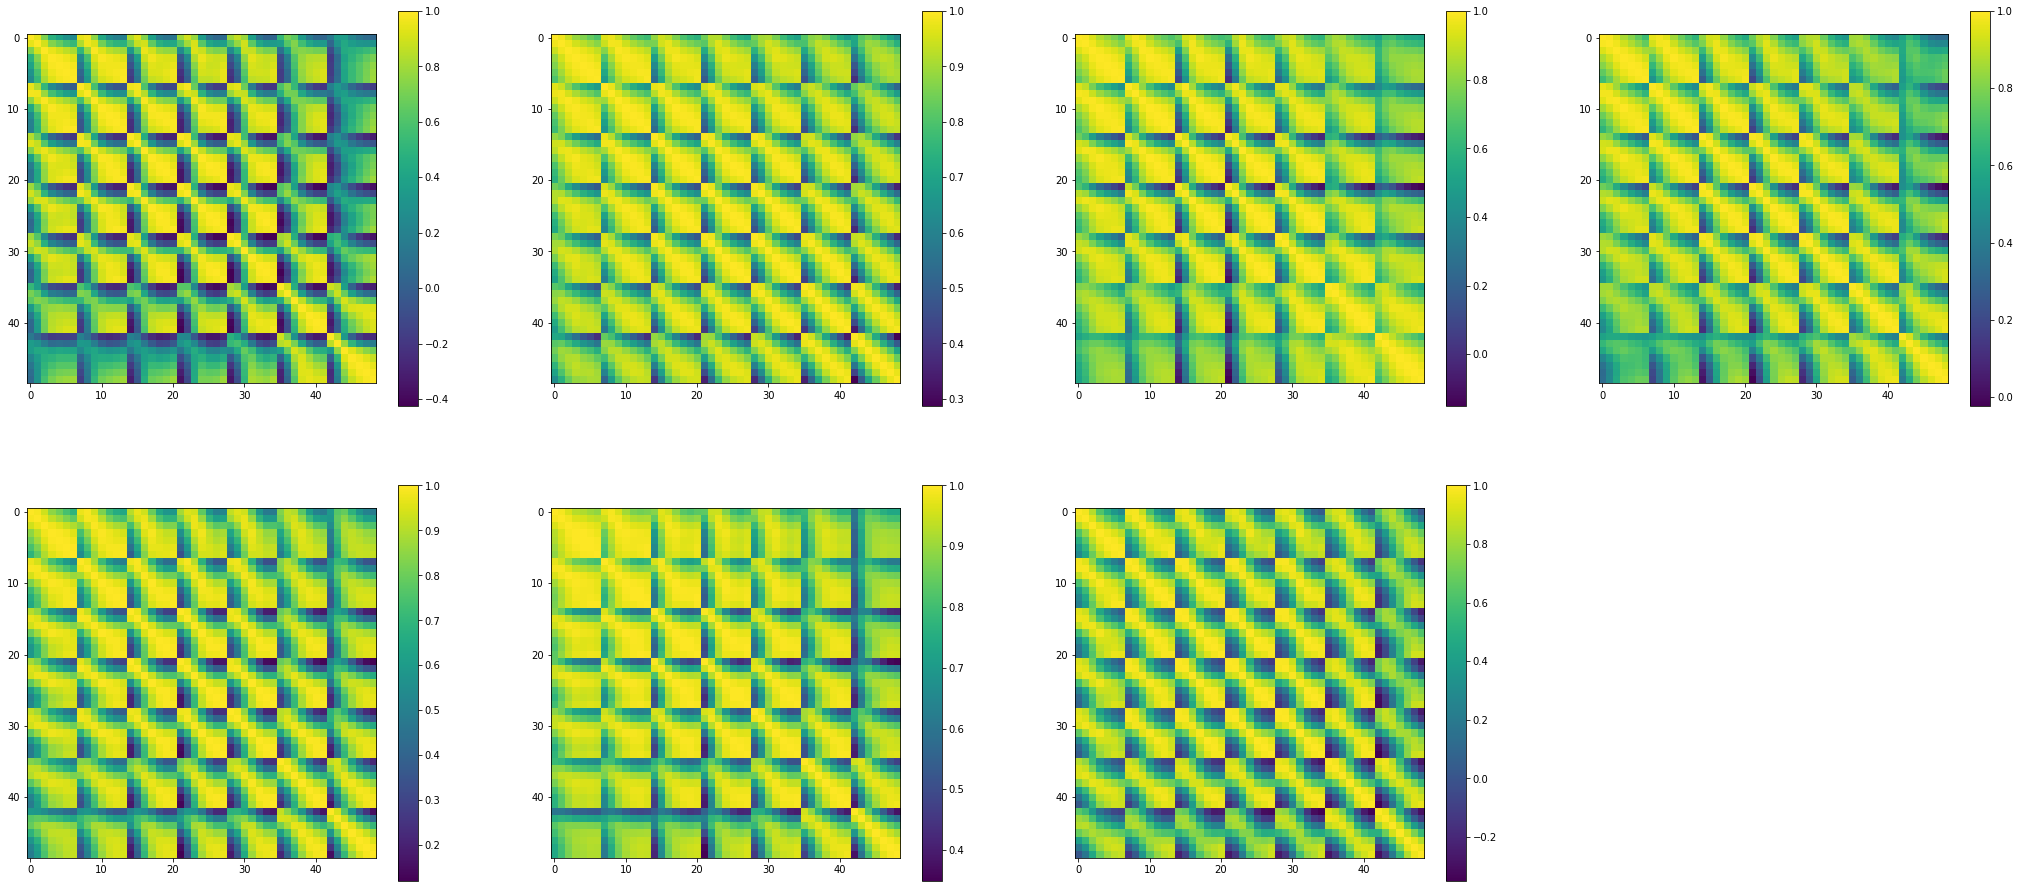

In [10]:
electrode_correlations = np.empty((0, 1176))
fig = plt.figure(figsize=(9 * 4, 8 * 2))

for phoneme in range(7):

  triu, covariance_matrix = get_covariance(meaned_over_ocur[phoneme].T)
  electrode_correlations = np.append(electrode_correlations,
                                     np.expand_dims(triu, axis=0),
                                     axis=0)
  ax = fig.add_subplot(2, 4, phoneme + 1)
  img = ax.imshow(covariance_matrix)
  plt.colorbar(img, ax=ax)
  
electrode_correlations.shape

In [6]:
k = 7
strings = np.array([f'L-El_{i+1}_{j+1}' for i in range(k) for j in range(k)])

row_inds, col_inds = np.triu_indices(k ** 2, k=1)
first_part, second_part = strings[row_inds], strings[col_inds]

pd_cols = [f'{f}-{s}' for f,s in zip(first_part, second_part)]

In [7]:
df = pd.DataFrame(electrode_correlations, columns=pd_cols)
df.head(7)

,L-El_1_1-L-El_1_2,L-El_1_1-L-El_1_3,L-El_1_1-L-El_1_4,L-El_1_1-L-El_1_5,L-El_1_1-L-El_1_6,L-El_1_1-L-El_1_7,L-El_1_1-L-El_2_1,L-El_1_1-L-El_2_2,L-El_1_1-L-El_2_3,L-El_1_1-L-El_2_4,...,L-El_7_3-L-El_7_4,L-El_7_3-L-El_7_5,L-El_7_3-L-El_7_6,L-El_7_3-L-El_7_7,L-El_7_4-L-El_7_5,L-El_7_4-L-El_7_6,L-El_7_4-L-El_7_7,L-El_7_5-L-El_7_6,L-El_7_5-L-El_7_7,L-El_7_6-L-El_7_7
0,0.947922,0.724645,0.486519,0.400073,0.304988,0.251828,0.947966,0.974520,0.754976,0.435473,...,0.932748,0.834068,0.753322,0.690679,0.974897,0.928987,0.872010,0.986045,0.945987,0.984178
1,0.984830,0.941531,0.889154,0.863410,0.831464,0.800647,0.965715,0.977986,0.941581,0.875850,...,0.970896,0.899499,0.816713,0.703499,0.977251,0.926914,0.837902,0.984445,0.927485,0.977492
2,0.989303,0.933350,0.861942,0.817452,0.766527,0.711155,0.934685,0.985985,0.948102,0.851614,...,0.981277,0.947389,0.913288,0.865205,0.990520,0.970202,0.930461,0.993263,0.964946,0.987591
3,0.989880,0.944823,0.869802,0.813730,0.749349,0.680296,0.960155,0.981748,0.952103,0.858255,...,0.963854,0.903363,0.847308,0.781566,0.983406,0.949689,0.892837,0.989135,0.949824,0.984065
4,0.989165,0.934798,0.850794,0.805182,0.743015,0.694093,0.974234,0.991135,0.944207,0.828073,...,0.956434,0.864039,0.779874,0.706397,0.972625,0.924891,0.868876,0.987092,0.952948,0.987247
5,0.992141,0.963705,0.928900,0.922514,0.904437,0.893207,0.975835,0.991483,0.962590,0.910119,...,0.970383,0.904726,0.847704,0.804685,0.980064,0.947414,0.915018,0.991467,0.972148,0.992993
6,0.975738,0.849490,0.633229,0.495208,0.371800,0.290107,0.976511,0.979315,0.878206,0.611119,...,0.906047,0.647220,0.395580,0.198314,0.905855,0.734703,0.562107,0.950855,0.843227,0.963292


## Classifying by the nearest covariance matrix

In [36]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(16, 10),
                          text_size=10, title='Confusion matrix'):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title=title,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

#### Using corrcoef to measure distance

In [22]:
def predict_corr(vector, correlations):
  '''
  Predicts vector label by comparing correlation distances between vectors

  Args:
  vector -- np.array, correlations vector of shape (n*(n-1) / 2, ),
  data to predict label of
  correlations -- np.array containing per label correlation vectors of shape
  (num_labels, n*(n-1) / 2)
  
  Returns:
  label - argmax over correlations
  '''
  X = np.concatenate((np.expand_dims(vector, axis=0), correlations), axis=0)
  covariance_vector = np.corrcoef(X)[0][1:]

  return np.argmax(covariance_vector)

In [28]:
predicted_labels = np.empty(0)
for x in X_train:
  v, _ = get_covariance(x.T)
  predicted_labels = np.append(predicted_labels, predict_corr(v, electrode_correlations))

In [13]:
x = X_train[0]
v, _ = get_covariance(x.T)

In [29]:
np.count_nonzero(predicted_labels + 11 == y_train) / len(y_train)

0.19230769230769232

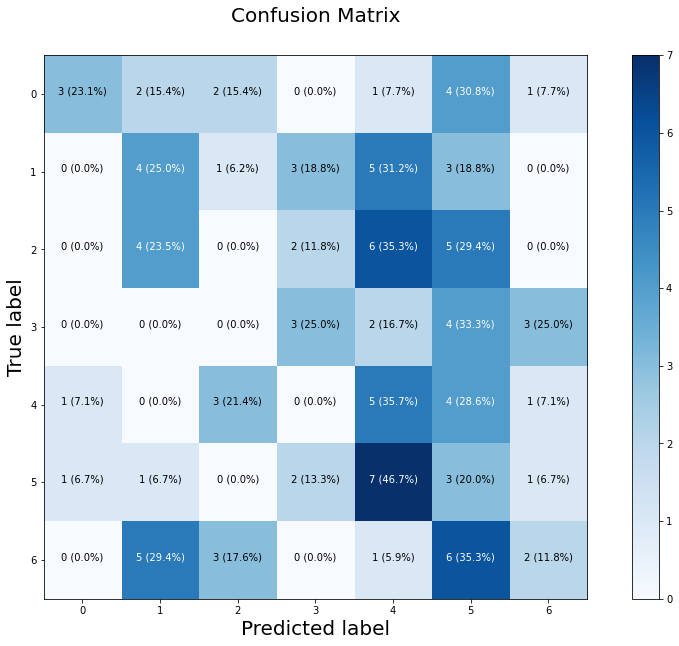

In [35]:
make_confusion_matrix(y_train - 11, predicted_labels)

In [41]:
# classifying by the nearest covariance matrix
# check whether the dataset is correct 
# try all the distance measures 
# project onto 7 meaned correlation vectors and then find distances
# neural net classification???
# AV analysis 
# singular basis...

In [ ]:
# testing data 

! pip install mne 
import mne
data = mne.io.read_raw_edf('/content/drive/MyDrive/EEG_data/relabeled_unpacked/Bondarev_phonemes_.EDF')

raw_data = data.get_data()
raw_data = raw_data[19:, :]

def select(values, indices):
  if values[0] == values[1] + 10:
    return set(indices)
  else:
    return {}

label_channel = raw_data[-1]

ind = np.arange(label_channel.shape[0])
ind = ind[label_channel > 0]

indices = set()

for i in range(ind.shape[0] - 1):
  indices = indices.union(select(label_channel[ind[i : i + 2]], ind[i : i + 2]))

indices = np.array(sorted(list(indices)))

label_channel[indices][:500]